In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


## Read the dataset

In [19]:
titanic=pd.read_csv(r"D:\EDA Datasets csv\titanic.csv")
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [21]:
# null values 
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
import warnings
warnings.filterwarnings('ignore')
titanic['Age'].fillna(method='bfill',inplace=True)

In [42]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
# 
titanic['Cabin'].isnull().sum()

687

In [46]:
mode=titanic['Cabin'].mode()
mode

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [76]:
titanic['Cabin'].fillna(mode,inplace=True)

In [78]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         2
dtype: int64

In [60]:
titanic['Cabin'].dropna(inplace=True)

In [70]:
titanic.drop_duplicates(inplace=True)

In [80]:
titanic['Embarked'].fillna(method='ffill',inplace=True)


In [82]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         0
dtype: int64

In [84]:
titanic['Cabin_Deck'] = titanic['Cabin'].astype(str).str[0]
titanic['Cabin_Deck'] = titanic['Cabin_Deck'].replace('n', np.nan)  # replace 'n' (from 'nan') with NaN


In [86]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         0
Cabin_Deck     685
dtype: int64

In [90]:
titanic['Cabin_Deck'].fillna(titanic['Cabin_Deck'].mode()[0], inplace=True)


In [88]:
titanic.drop('Cabin', axis=1, inplace=True)



In [92]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Cabin_Deck     0
dtype: int64

In [94]:
# describe : Its use for stastics analysis 
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.870561,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.597668,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,39.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [96]:
# info() -- means information about dataset 
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Cabin_Deck   891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [98]:
titanic.value_counts()

PassengerId  Survived  Pclass  Name                                      Sex     Age    SibSp  Parch  Ticket      Fare    Embarked  Cabin_Deck
1            0         3       Braund, Mr. Owen Harris                   male    22.00  1      0      A/5 21171   7.250   S         B             1
599          0         3       Boulos, Mr. Hanna                         male    49.00  0      0      2664        7.225   C         C             1
588          1         1       Frolicher-Stehli, Mr. Maxmillian          male    60.00  1      1      13567       79.200  C         B             1
589          0         3       Gilinski, Mr. Eliezer                     male    22.00  0      0      14973       8.050   S         C             1
590          0         3       Murdlin, Mr. Joseph                       male    35.00  0      0      A./5. 3235  8.050   S         C             1
                                                                                                                     

In [106]:
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [108]:
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Figure size 1000x1000 with 0 Axes>

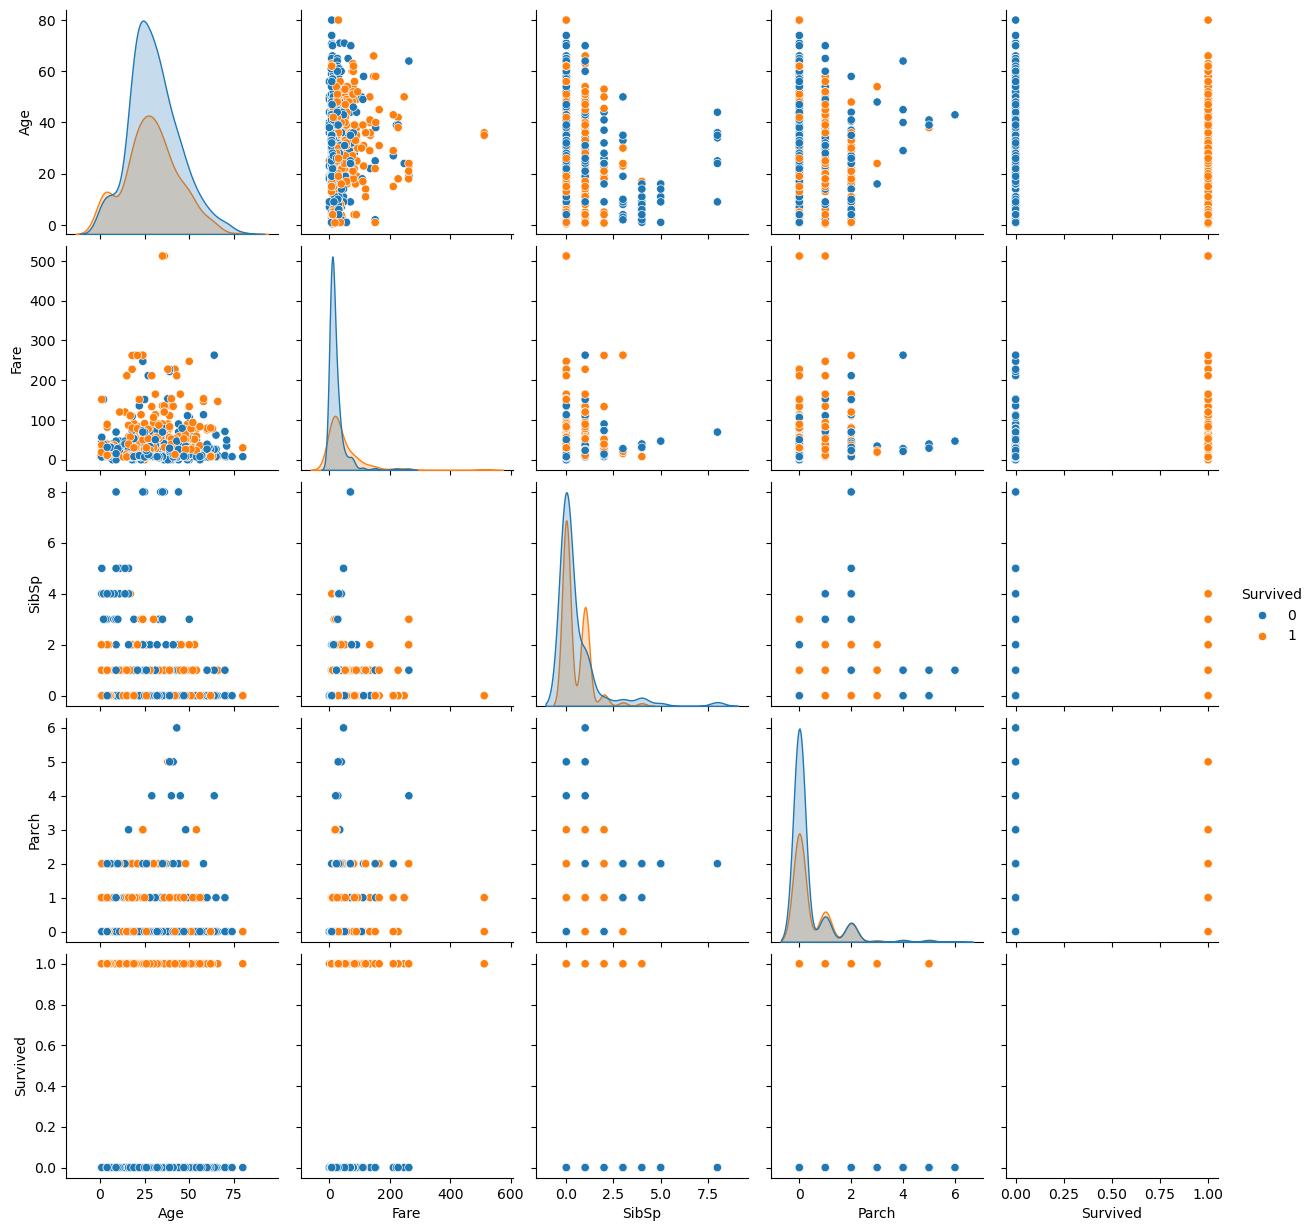

In [124]:
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived']
plt.figure(figsize=(10,10))
# sns.pairplot(titanic[numeric_cols],hue='Survived')
sns.pairplot(titanic,vars=numeric_cols,hue='Survived')

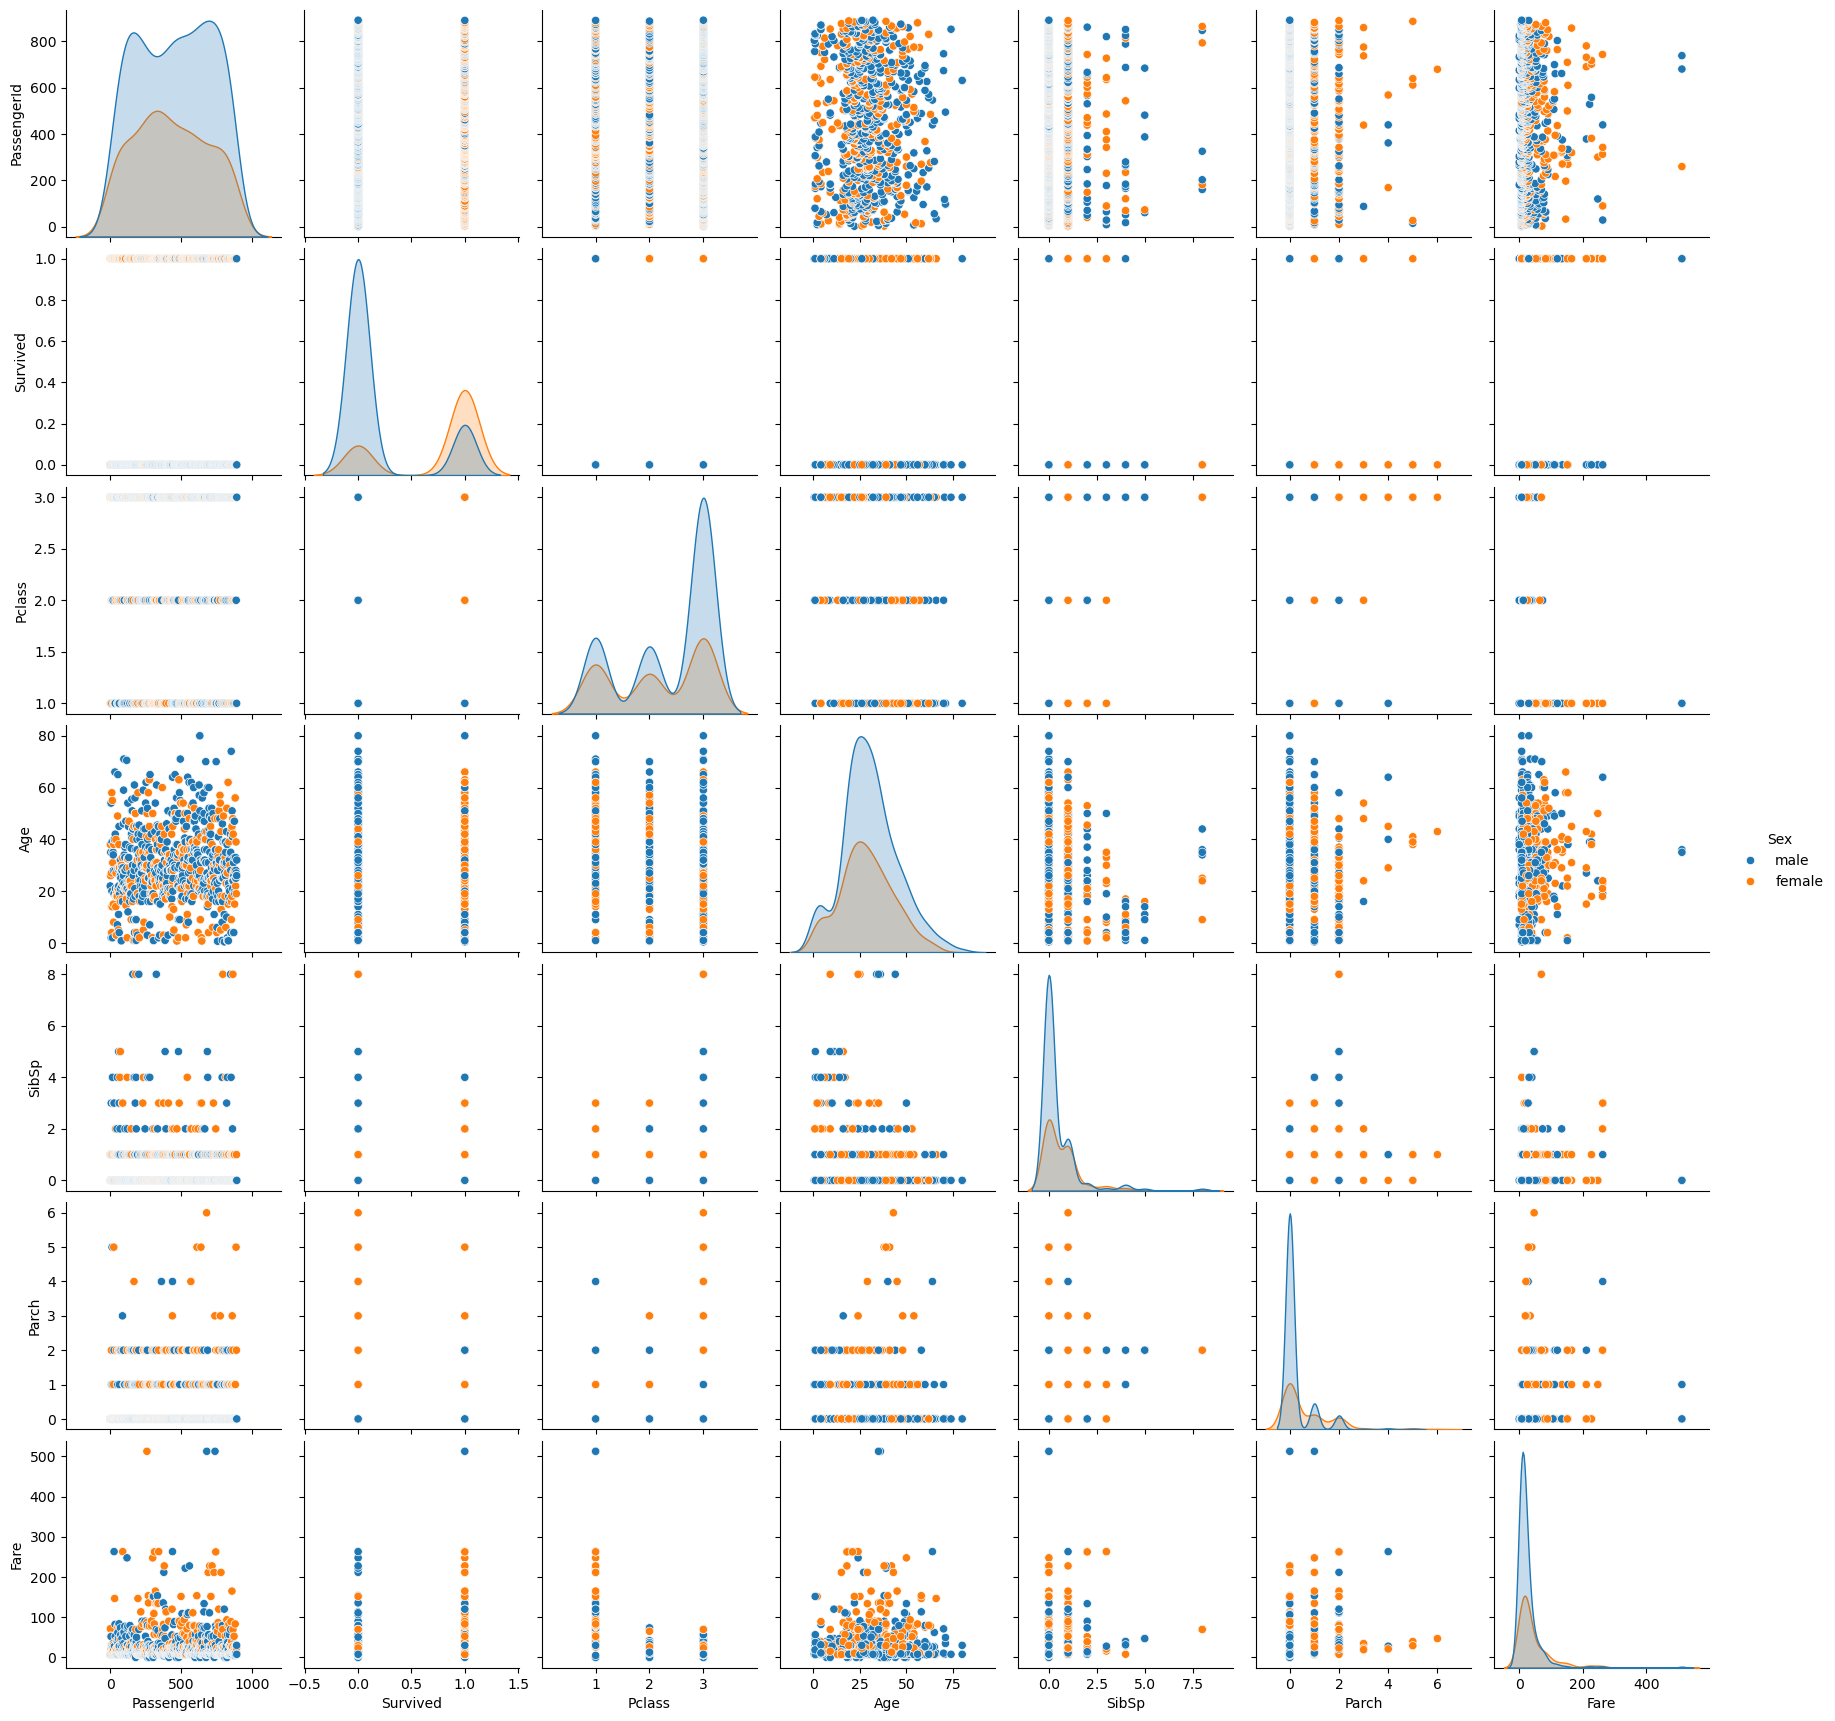

In [112]:
# pairplots ()
sns.pairplot(data=titanic,hue='Sex')

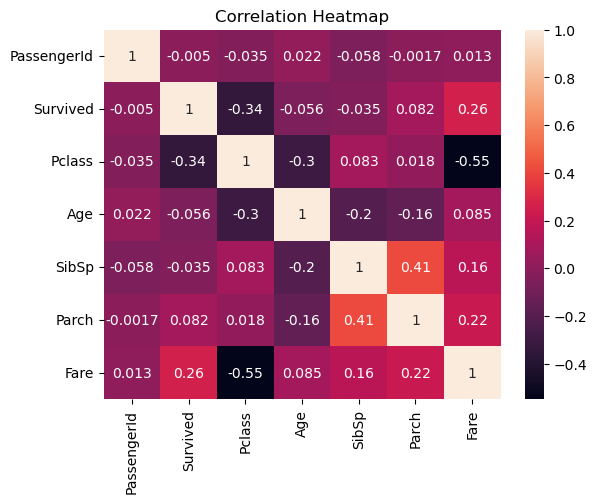

In [130]:
# sns.heatmap()
corr=titanic.corr(numeric_only=True)
sns.heatmap(corr,annot=True)
plt.title('Correlation Heatmap')
plt.show()

- fare and pclass have negative correlation (higher class → higher fare).

- Weak correlation between age and survival.

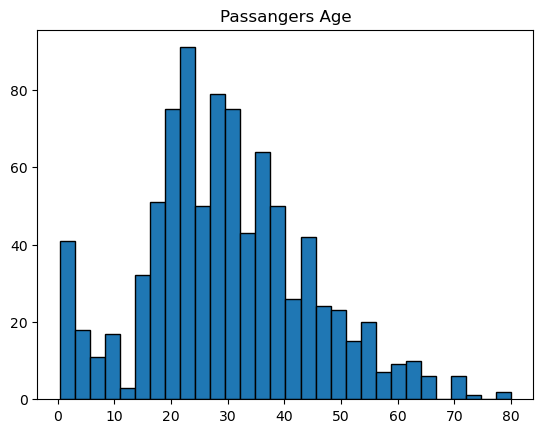

In [144]:
# Histogram 
titanic['Age'].hist(bins=30,grid=False,edgecolor='black')
plt.title("Passangers Age")
plt.show()

- Most passengers between 20–40 years.

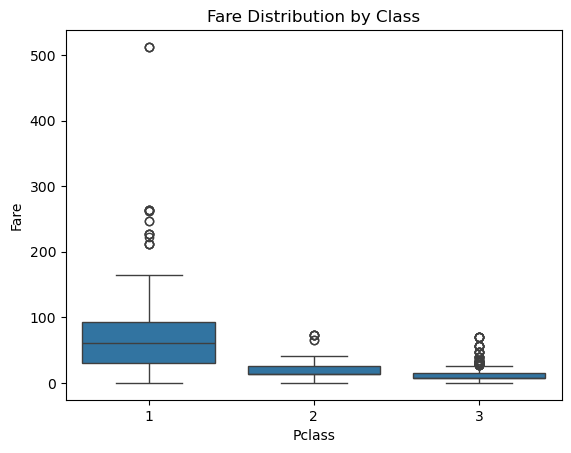

In [160]:
sns.boxplot(x='Pclass',y='Fare',data=titanic)
plt.title('Fare Distribution by Class')
plt.show()

- 1st class passengers paid much higher fares.

In [163]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,B
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,G
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,C


In [171]:
# plt.scatter(titanic['Age'],titanic['Fare'])

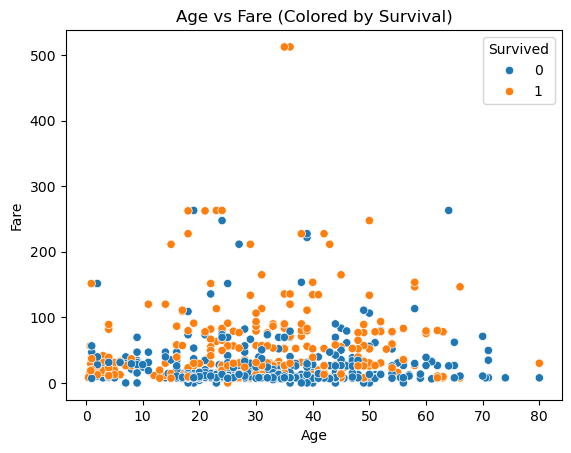

In [179]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic)
plt.title('Age vs Fare (Colored by Survival)')
plt.show()

- Younger + higher-paying passengers had higher survival chances.

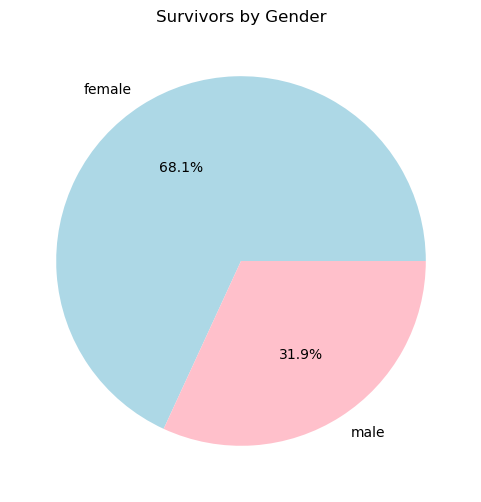

In [182]:
survivors_by_gender = titanic[titanic['Survived'] == 1]['Sex'].value_counts()

# Plot
plt.figure(figsize=(6,6))
plt.pie(survivors_by_gender, labels=survivors_by_gender.index, autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Survivors by Gender')
plt.show()

### summary of findings 

In [ ]:
- Female has high survival rate than males
- first class passagners more like to survive 
- age between 20 - 30 peoples are unsurvived(died) most
- cabin_deck has 70% of missing data 
- 
